<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C1/C1.html"><img src="../data/C1_nav.png" width="100"  style="float:right;" alt="C1"></a>
<h1> Chroma and Shepard Tones</h1>        
</div>

<br />

<p>
In this notebook, we discuss the notion of chroma and introduce Shepard's helix of pitch following Section 1.1.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>. Furthermore, we introdue a sonfication of chroma using Shepard tones.  
</p> 

## Chroma

Ordering all notes of the <a href="../C1/C1S1_MusicalNotesPitches.html">equal-tempered scale</a> according to their pitches, one obtains an equal-tempered **chromatic scale**, where all notes of the scale are equally spaced. The term **chromatic** is derived from the Greek word **chroma**, meaning color. In the music context, the term **chroma** closely relates to the twelve different pitch classes. For example, the notes C2 and C5 both
have the same chroma value C. In other words, all notes that have the same chroma value belong to the same pitch class.

Notes that belong to the same pitch class (or have the same chroma value) are perceived as similar in a certain way. In contrast, notes that belong to different pitch classes (or have different chroma values) are perceived as dissimilar. This justifies the usage of the term **chroma** in the sense that
notes with different chroma values have a different **sound color.** The cyclic nature of chroma values is illustrated by the **chromatic circle** as shown in the following figure. Extending this notion, **Shepard's helix of pitch**, named after Roger Shepard (\* 1929), represents the linear pitch space as a helix wrapped around a cylinder so that octave-related pitches lie along a single vertical line. The projection of the cylinder onto the horizontal plane yields the chromatic circle.

<img src="../data/C1/FMP_C1_F03.png" width="600px" align="middle" alt="C1">

## Shepard Tones

Shepard's helix of pitch can be sonified using  <a href="https://en.wikipedia.org/wiki/Shepard_tone">Shepard tones</a>, each being a weighted superposition of sine waves separated by octaves. When playing these tones moving up the chromatic scale, one obtains the auditory illusion of a tone that continuously moves up (similar to the visual illusion of the every ascending <a href="https://en.wikipedia.org/wiki/Penrose_stairs">Penrose stairs</a>). 

<img src="../data/C1/FMP_C1_PenroseStairs.png" width="300px" align="middle" alt="C1">

In the following code example, only sine waves within the human range of hearing (frequencies from approximately 20 to 20000 Hertz) are used. No specific weighting is used, i.e., all sine waves have an amplitude of one. Finally, Shepard tones are generated for a chromatic scale starting with C3 (MIDI pitch 48) and ending wtih C5 (MIDI pitch 72).

<img src="../data/C1/FMP_C1_F02.png" width="500px" align="middle" alt="C1">

In [1]:
import numpy as np
import IPython.display as ipd

def generate_shepard_tone(freq=440, dur=0.5, Fs=44100, amp=1):
    """Generate Shepard tone

    Notebook: C1/C1S1_ChromaShepard.ipynb

    Args:
        freq (float): Frequency of Shepard tone (Default value = 440)
        dur (float): Duration (in seconds) (Default value = 0.5)
        Fs (scalar): Sampling rate (Default value = 44100)
        amp (float): Amplitude of generated signal (Default value = 1)

    Returns:
        x (np.ndarray): Shepard tone
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    num_sin = 1
    x = np.sin(2 * np.pi * freq * t)
    freq_lower = freq / 2
    while freq_lower > 20:
        num_sin += 1
        x = x + np.sin(2 * np.pi * freq_lower * t)
        freq_lower = freq_lower / 2
    freq_upper = freq * 2
    while freq_upper < 20000:
        num_sin += 1
        x = x + np.sin(2 * np.pi * freq_upper * t)
        freq_upper = freq_upper * 2
    x = x / num_sin
    x = amp * x / np.max(x)
    return x, t

def f_pitch(p):
    F_A4 = 440
    return F_A4 * 2 ** ((p - 69) / 12)
    
Fs = 44100
dur = 0.5

pitch_start = 48
pitch_end = 72
scale = []
for p in range(pitch_start, pitch_end + 1):
    freq = f_pitch(p)    
    s, t = generate_shepard_tone(freq=freq, dur=dur, Fs=Fs, amp = 0.5)
    scale = np.concatenate((scale, s))
    
ipd.display(ipd.Audio(scale, rate=Fs))

##  Shepard&ndash;Risset Glissando

Instead of using a discrete scale, one can generate a continuous version, where the Shepard tones ascend (or descent) continuously. Originally created by the French composer Jean-Claude Risset (1938–2016), this continuous version is also known as **Shepard&ndash;Risset glissando**. The following code example generates an ascending glissando. First, a **chirp** signal with an exponentially rising frequency (corresponding to a perceptually linear increase in pitch) is defined. Here, note that the instantaneous frequency is given by the derivative of the sinusoidal's argument. The created chirp signal covers exactly one octave. Then, analogous to the Shepared tones, superpositions of chirps separated by octaves are generated. After covering one octave, the end of the resulting Shepard&ndash;Risset glissando (perceptually) coincides with its beginning. Therefore, one obtains a nonstop version by concatenating several glissandi. 

In [2]:
import IPython.display as ipd
import numpy as np

def generate_chirp_exp_octave(freq_start=440, dur=8, Fs=44100, amp=1):
    """Generate one octave of a chirp with exponential frequency increase

    Notebook: C1/C1S1_ChromaShepard.ipynb

    Args:
        freq_start (float): Start frequency of chirp (Default value = 440)
        dur (float): Duration (in seconds) (Default value = 8)
        Fs (scalar): Sampling rate (Default value = 44100)
        amp (float): Amplitude of generated signal (Default value = 1)

    Returns:
        x (np.ndarray): Chirp signal
        t (np.ndarray): Time axis (in seconds)
    """
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    x = np.sin(2 * np.pi * freq_start * np.power(2, t / dur) / np.log(2) * dur)
    x = amp * x / np.max(x)
    return x, t

def generate_shepard_glissando(num_octaves=3, dur_octave=8, Fs=44100):
    """Generate several ocatves of a Shepared glissando

    Notebook: C1/C1S1_ChromaShepard.ipynb

    Args:
        num_octaves (int): Number of octaves (Default value = 3)
        dur_octave (int): Duration (in seconds) per octave (Default value = 8)
        Fs (scalar): Sampling rate (Default value = 44100)

    Returns:
        x (np.ndarray): Shepared glissando
        t (np.ndarray): Time axis (in seconds)
    """
    freqs_start = 10 * 2**np.arange(0, 11)
    # Generate Shepard glissando by superimposing chirps that differ by octaves
    for freq in freqs_start:
        if freq == 10:
            x, t = generate_chirp_exp_octave(freq_start=freq, dur=dur_octave, Fs=Fs, amp=1)
        else:
            chirp, t = generate_chirp_exp_octave(freq_start=freq, dur=dur_octave, Fs=Fs, amp=1)
            x = x + chirp
    x = x / len(freqs_start)
    # Concatenate several octaves
    x = np.tile(x, num_octaves)
    N = len(x)
    t = np.arange(N) / Fs
    return x, t
    
glissando, t = generate_shepard_glissando(num_octaves=3, dur_octave=8)
ipd.display(ipd.Audio(glissando, rate=Fs))

Risset used such a glissando in a prominent way in the second movement *Fall* of his electronic music piece *Computer Suite from Little Boy* from 1968.
With the seemingly endlessly descending glissandi the composer makes reference to the atomic bomb dropped on Hiroshima.
The following YouTube video gives the complete suite with the second movement starting from 4:40.

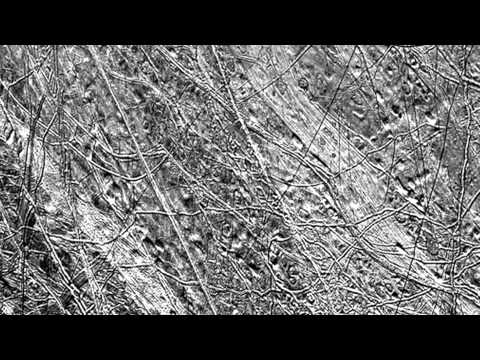

In [3]:
ipd.display(ipd.YouTubeVideo('RcX0ubvoZUA', start=278, width=600, height=450))

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>